# Course work: Intro to ML
## Objective: practice the preparation and modeling of data in order to predict the cancellation of hotel bookings
### Collaborative work by Giorgios, Pablo and Marius
### Data can be found at https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

## Step 1: importing libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



C:\Users\mariu\AppData\Local\Temp\ipykernel_16092\563256088.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## Inspection

In [2]:
# Displaying hidden columns
pd.set_option('display.max_columns', None) 

In [3]:
hotel= pd.read_csv("../data/hotel_bookings.csv")
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel.shape

(119390, 32)

# Data Understanding

In [5]:
#Column names
print("Column Names:")
print(hotel.columns)

Column Names:
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [6]:
#What each column holds, documented on kaggle: 
Schema_non_intuitive_columns = {
    "hotel": "There are only two hotel types: Resort Hotel or City Hotel",
    "is_canceled": "Value indicating if the booking was canceled (1) or not (0)",

    "lead_time": "Number of days that elapsed between the entering date of the booking into the PMS and the arrival date",
    "stays_in_weekend_nights": "Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel",
    "stays_in_week_nights": "Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel",
    
    "meal" : """Type of meal booked. Categories are presented in standard hospitality meal packages: 
        Undefined/SC – no meal package; 
        BB – Bed & Breakfast; 
        HB – Half board (breakfast and one other meal – usually dinner); 
        FB – Full board (breakfast, lunch and dinner)""",

    "country" : "Country of origin. Categories are represented in the ISO 3155–3:2013 format",
    "market_segment" : """Market segment designation. 
        “TA” means “Travel Agents” 
        “TO” means “Tour Operators”""",

    "distribution_channel" : """Booking distribution channel. 
        “TA” means “Travel Agents” 
        “TO” means “Tour Operators”""",

    "is_repeated_guest" : "Value indicating if the booking name was from a repeated guest (1) or not (0)",
    
    "previous_cancellations" : "Number of previous bookings that were cancelled by the customer prior to the current booking",
    "previous_bookings_not_canceled" : "Number of previous bookings not cancelled by the customer prior to the current booking",
    
    "reserved_room_type" : "Code of room type reserved.",
    "assigned_room_type" : "Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request.",
    "booking_changes" : "Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation",
    "deposit_type" : """"Indication on if the customer made a deposit to guarantee the booking. 
        This variable can assume three categories: 
        No Deposit – no deposit was made; 
        Non Refund – a deposit was made in the value of the total stay cost; 
        Refundable – a deposit was made with a value under the total cost of stay""",

    "agent" : "ID of the travel agency that made the booking",
    "company" : "ID of the company/entity that made the booking or responsible for paying the booking.",
    "days_in_waiting_list" : "Number of days the booking was in the waiting list before it was confirmed to the customer",
    
    "customer_type" : """Type of booking, assuming one of four categories: 
        Contract - when the booking has an allotment or other type of contract associated to it; 
        Group – when the booking is associated to a group; 
        Transient – when the booking is not part of a group or contract, and is not associated to other Transient parties
        Transient Party - ...""", 

    "Transient-party": "When the booking is transient, but is associated to at least other transient booking",
    
    "adr" : "Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights",
    
    "required_car_parking_spaces" : "Number of car parking spaces required by the customer",
    
    "total_of_special_requests" : "Number of special requests made by the customer (e.g. twin bed or high floor)",
    
    "reservation_status" : """Reservation last status, assuming one of three categories: 
        Canceled – booking was canceled by the customer; 
        Check-Out – customer has checked in but already departed; 
        No-Show – customer did not check-in and did inform the hotel of the reason why""",

    "reservation_status_date" : "Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel"


}



## Describing the ambiguous columns, as documented on kaggle: 
- `hotel` : There are only two hotel types: Resort Hotel or City Hotel
- `is_canceled` : "Value indicating if the booking was canceled (1) or not (0)
- `lead_time`: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- `stays_in_weekend_nights`: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- `stays_in_week_nights`: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- `meal`: Type of meal booked. Categories are presented in standard hospitality meal packages: 
    - Undefined/SC – no meal package
    - BB – Bed & Breakfast
    - HB – Half board (breakfast and one other meal – usually dinner)
    - FB – Full board (breakfast, lunch and dinner)
- `country`: Country of origin. Categories are represented in the ISO 3155–3:2013 format
- `market_segment`: Market segment designation. 
    - “TA” means “Travel Agents”
    - “TO” means “Tour Operators”
- `distribution_channel`: Booking distribution channel. 
    - “TA” means “Travel Agents”
    - “TO” means “Tour Operators”
- `is_repeated_guest`: Value indicating if the booking name was from a repeated guest (1) or not (0)
- `previous_cancellations`: Number of previous bookings that were cancelled by the customer prior to the current booking
- `previous_bookings_not_canceled`: Number of previous bookings not cancelled by the customer prior to the current booking
- `reserved_room_type`: Code of room type reserved.
- `assigned_room_type`: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request.
- `booking_changes`: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- `deposit_type`: Indication on if the customer made a deposit to guarantee the booking. 
    - This variable can assume three categories: 
    - No Deposit – no deposit was made
    - Non Refund – a deposit was made in the value of the total stay cost
    - Refundable – a deposit was made with a value under the total cost of stay
- `agent`: ID of the travel agency that made the booking
- `company`: ID of the company/entity that made the booking or responsible for paying the booking.
- `days_in_waiting_list`: Number of days the booking was in the waiting list before it was confirmed to the customer
- `customer_type`: Type of booking, assuming one of four categories: 
    - Contract - when the booking has an allotment or other type of contract associated to it
    - Group – when the booking is associated to a group
    - Transient – when the booking is not part of a group or contract, and is not associated to other Transient parties
    - Transient Party - ...
- `Transient-party`: When the booking is transient, but is associated to at least other transient booking
- `adr`: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- `required_car_parking_spaces`: Number of car parking spaces required by the customer
- `total_of_special_requests`: Number of special requests made by the customer (e.g. twin bed or high floor)
- `reservation_status`: Reservation last status, assuming one of three categories: 
    - Canceled – booking was canceled by the customer
    - Check-Out – customer has checked in but already departed
    - No-Show – customer did not check-in and did inform the hotel of the reason why
- `reservation_status_date`: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

### The bookings are made in one of two ways
### The cancelation label comes at this point in the journey
### ...

### Questions

`assigned_room_type` - when were they assigned this: prior to visit, at visit. Does it come before cancellation ? Is this data present for cancelled guests ?

how smart would it be to focus our attention only on one hotel type ? `City_hotel` having a 66% share of the date...

transient ? meaning

customer type ? meaining

`assigned_as_reserved` - do we have the information to make the call about upgrade or downgrade ?

! Very few people going with booking for non refundable `deposit_type`. counter intuitive ??

### Candidates for feature engineering:

`previous_cancellations` and `previous_bookings_not_canceled` as a ratio ? 

`babies` and `children` encoded as true or false for `with_young_ones`

`reserved_room_type` vs `assigned_room_type` encoded as `assigned_as_reserved` - whether the same room assigned as reserved
could be more useful as 0:not, 1:yes, 2:upgrade (but we dont have this information of number meaning - order and hierarchy)

~Forget about it. dont have date of booking in calendar and can't be computed. Canceled date (computed from `Reservation_status` = canceled filtered, then looking at `Reservation_status_date`) could be converted in lead time absolute value difference, or lead time into a date. this way can have a new variable: canceled how much ahead of time.

### Other relevant columns:

`is_cancelled`

`deposit_type`

`is_repeated_guest`

`booking_changes` - booking # of changes

`days_in_waiting_list`



### Need to reshape/ convert

...


### Visualize and inspect
### At least a few correlation analyses:

`reservation_status` - to be paired with `is_canceled` for better understanding of the label

`reservation_status_date` - is key too. when canceled, how compares to changes made on behalf of hotel: like room assigned


### Hypotheses for some T-tests ??? 

...


### Alg selection:


Regression with very few independent variables


K-Means requires scaling for best results


Decision tree uses thresholds, so does not consider as continous the ones that are categorical encoded

* depth and over fitting


Naive Bays ?



# Exploratory Data Analysis(EDA)

In [7]:
print("\nData Types:")
print(hotel.dtypes)


Data Types:
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                

In [8]:
#Checking the missing values
print("\nMissing Values:")
print(hotel.isnull().sum())


Missing Values:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340

We can therefore conclude that the data is clean and does not present significant missing values (defined as)

We therefore continue to encoding, scaling and reformatting the data - ready for modeling.

In [9]:
# Define numerical features
X_numerical = hotel.select_dtypes(include=['float64','int64'])
X_numerical

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.00,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.00,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.00,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.00,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,0,0,0,0,394.0,NaN,0,96.14,0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,0,0,0,0,9.0,NaN,0,225.43,0,2
119387,0,34,2017,35,31,2,5,2,0.0,0,0,0,0,0,9.0,NaN,0,157.71,0,4
119388,0,109,2017,35,31,2,5,2,0.0,0,0,0,0,0,89.0,NaN,0,104.40,0,0


In [10]:
# Define Categorical features
X_categorical = hotel.select_dtypes(include=['object'])
X_categorical

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
1,Resort Hotel,July,BB,PRT,Direct,Direct,C,C,No Deposit,Transient,Check-Out,2015-07-01
2,Resort Hotel,July,BB,GBR,Direct,Direct,A,C,No Deposit,Transient,Check-Out,2015-07-02
3,Resort Hotel,July,BB,GBR,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out,2015-07-02
4,Resort Hotel,July,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,BEL,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-06
119386,City Hotel,August,BB,FRA,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out,2017-09-07
119387,City Hotel,August,BB,DEU,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out,2017-09-07
119388,City Hotel,August,BB,GBR,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2017-09-07


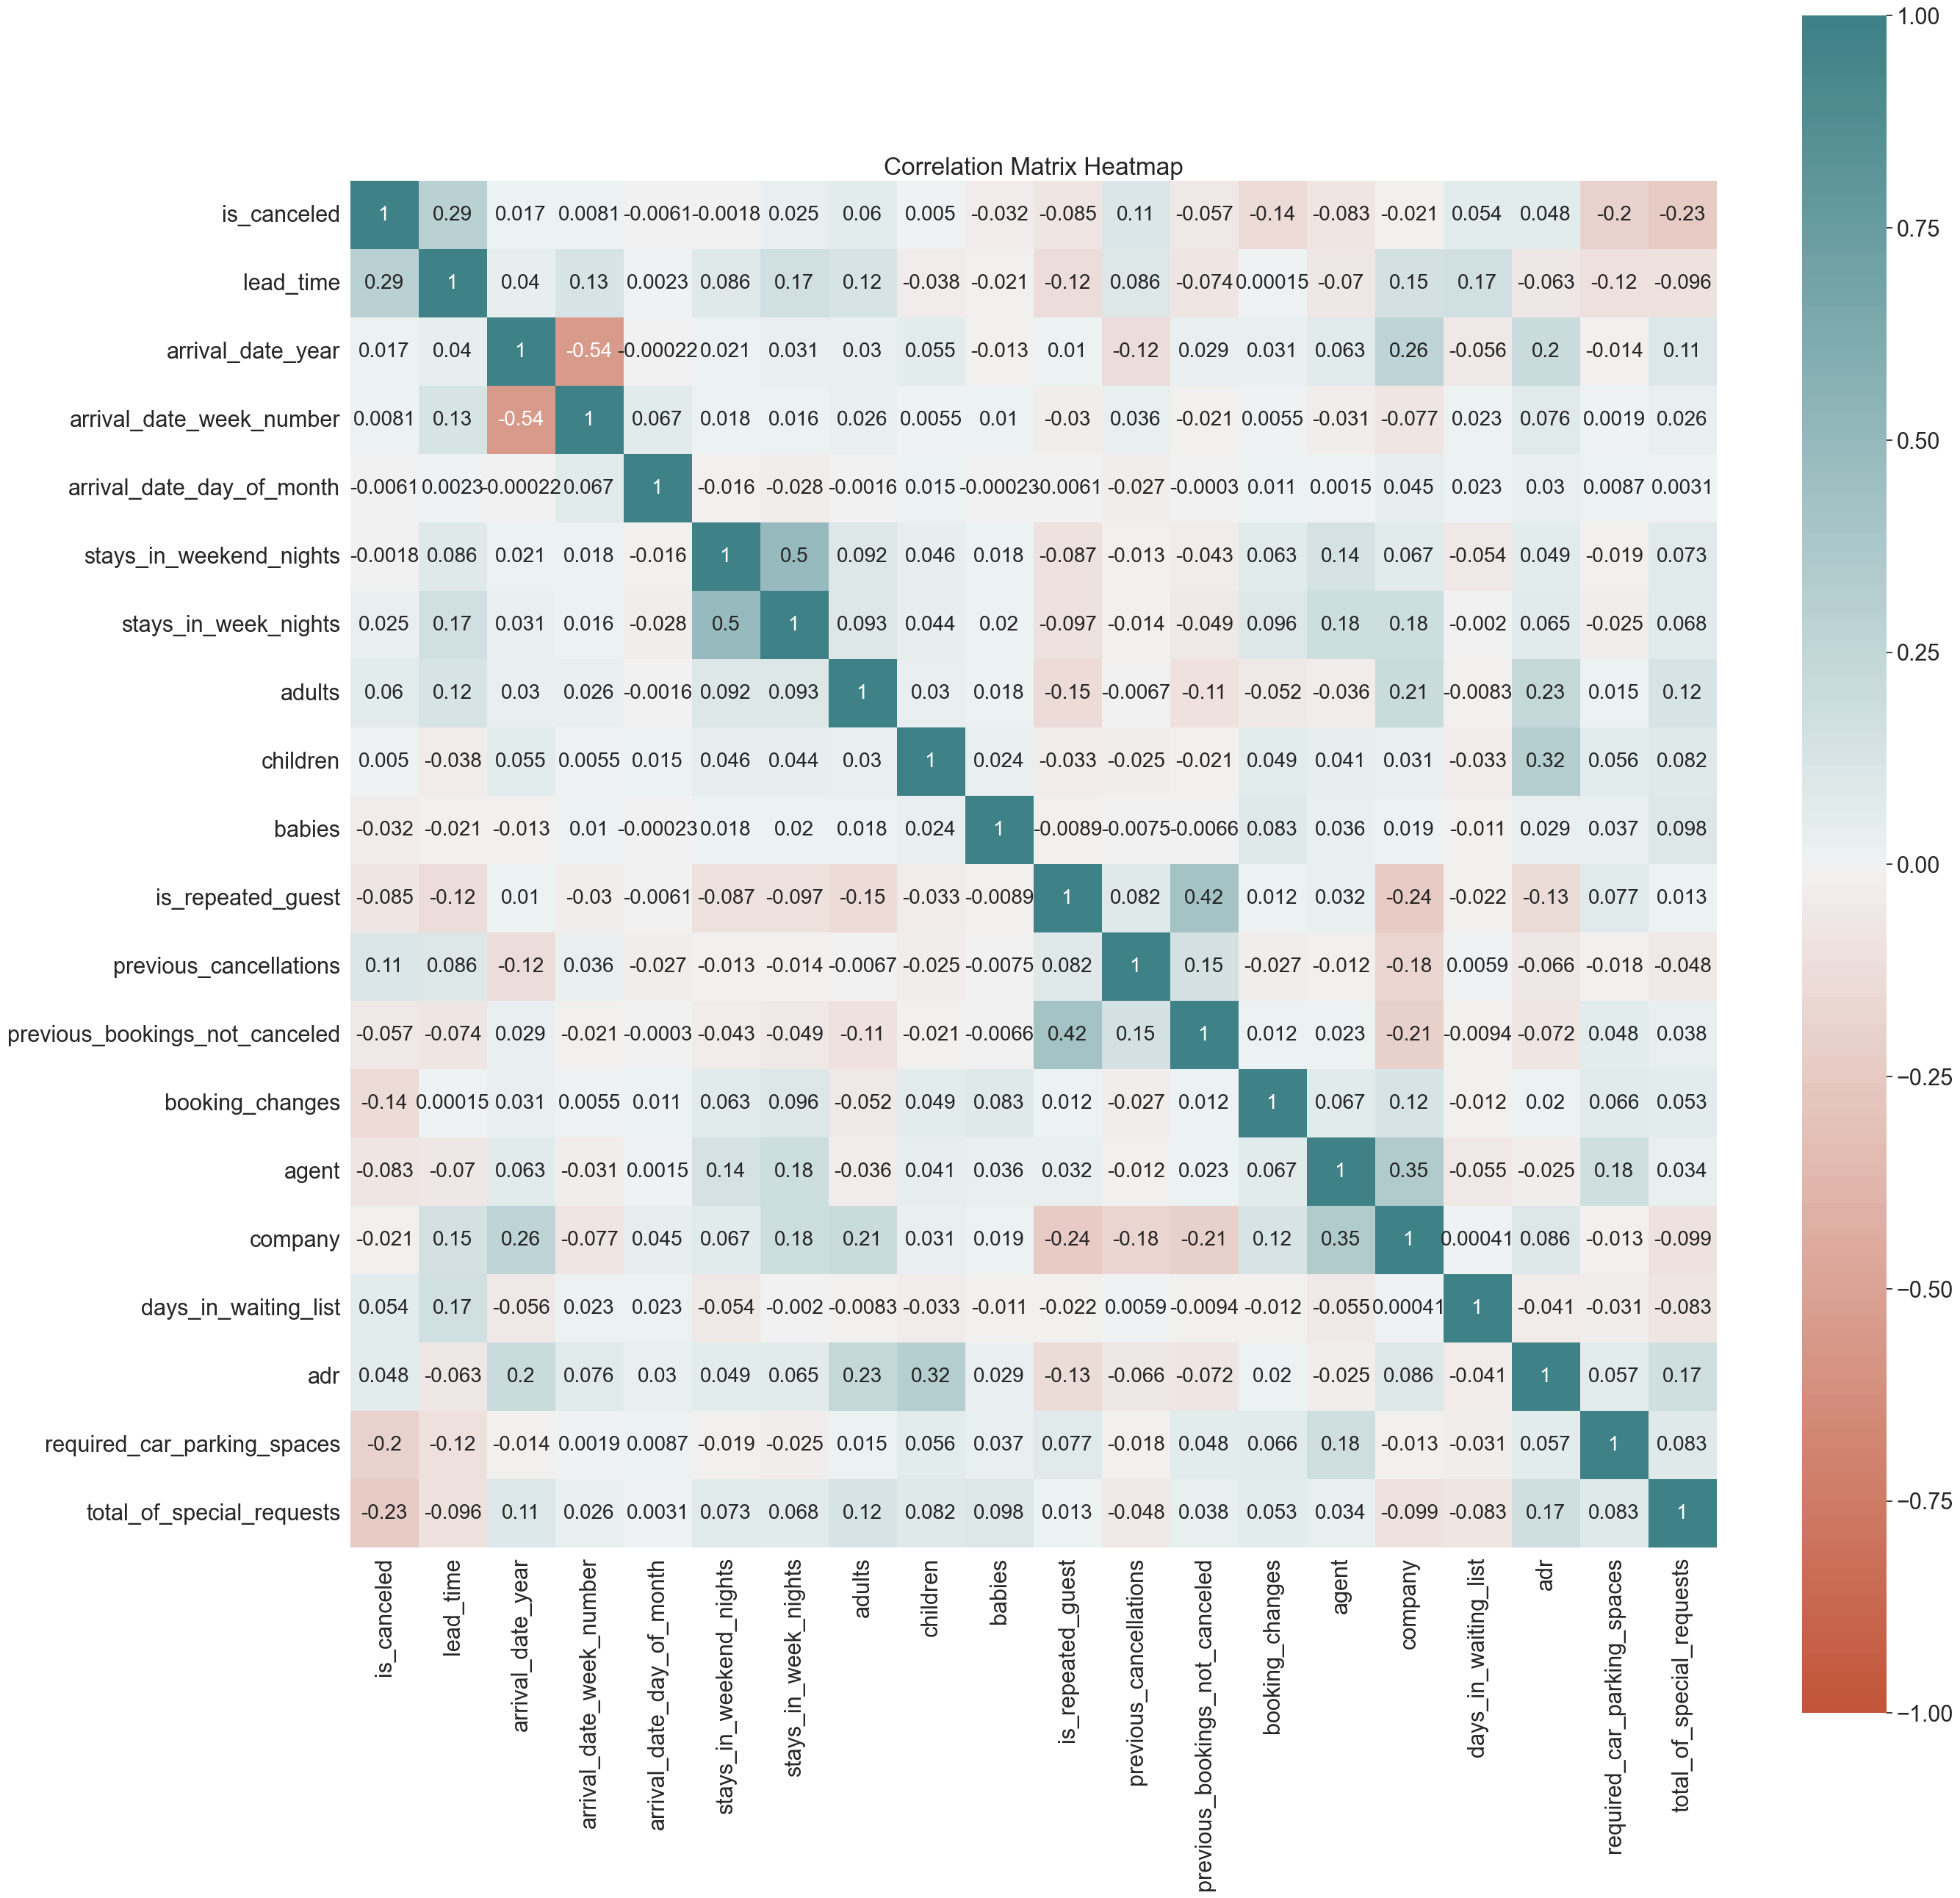

In [11]:
# Plot correlation matrix
cormat = X_numerical.corr()

plt.figure(figsize=(30, 30))
sns.set(font_scale=2.0)
ax = sns.heatmap(
    cormat,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True, annot=True, annot_kws={'size': 20}
)
plt.title('Correlation Matrix Heatmap', fontsize=24)
plt.show()

As we can observe there is no high correlation among features so will leave it as it is

## Data cleansing (N/A)

In [12]:
#drop company column because of the high N/A values
hotel_clean = hotel.drop(columns=['company'] )

In [13]:
#cleanse of N/A values for Children or Country (which are used in Logistic Regression, SVM and Random Forrests)
hotel_clean.dropna(subset=  ['children','country'], inplace = True)

## Feature engineering starts here

In [14]:
# copy hotel dataframe into a new one that will be modified
hotel_eng = pd.DataFrame()
hotel_eng = hotel_clean.copy()

In [15]:

# compute previous cancellation ratio
hotel_eng['previous_cancellation_ratio'] = np.nan_to_num((hotel_eng['previous_cancellations'] / (hotel_eng['previous_bookings_not_canceled'] + hotel_eng['previous_cancellations'])), nan=0)
hotel_eng['previous_cancellation_ratio'][0:10]

# Drop to avoid linear relationship between indpendent variables
hotel_eng.drop(columns=['previous_cancellations', 'previous_bookings_not_canceled'], inplace=True)


In [16]:
#comment out to avoid linear relationship between indpendent variables

# compute with kids or not - Note: some data lost here indeed, doing as experiment
# hotel_eng['with_kids'] = hotel_eng['children'].astype(bool) | hotel_eng['babies'].astype(bool)

# Testing for sanity
""" 
plt.bar(hotel_eng['with_kids'].unique(), hotel_eng['with_kids'].value_counts())
plt.xlabel('with_kids')
plt.ylabel('Frequency')
plt.title('Bar Plot of with_kids')
plt.show() 
"""

" \nplt.bar(hotel_eng['with_kids'].unique(), hotel_eng['with_kids'].value_counts())\nplt.xlabel('with_kids')\nplt.ylabel('Frequency')\nplt.title('Bar Plot of with_kids')\nplt.show() \n"

In [17]:
# Whether the room assigned is the same as the one reserved (safe to assume its upgrade, in certain countries)
hotel_eng['assigned_as_reserved'] = hotel_eng['reserved_room_type'] == hotel_eng['assigned_room_type']

# drop to avoid linear relationship between indpendent variables
hotel_eng.drop(columns = ['reserved_room_type', 'assigned_room_type'], inplace=True)

In [18]:

# Encode the deposit_type variable as 200 for when non refundable, 0 otherwise
hotel_eng['deposit_type_encoded'] = hotel_eng['deposit_type'].map({'No Deposit': 0, 'Non Refund': 2e2})

#drop to avoid linear relationship between indpendent variables
hotel_eng.drop(columns = ['deposit_type'], inplace=True)

hotel_eng['deposit_type_encoded'].max()

200.0

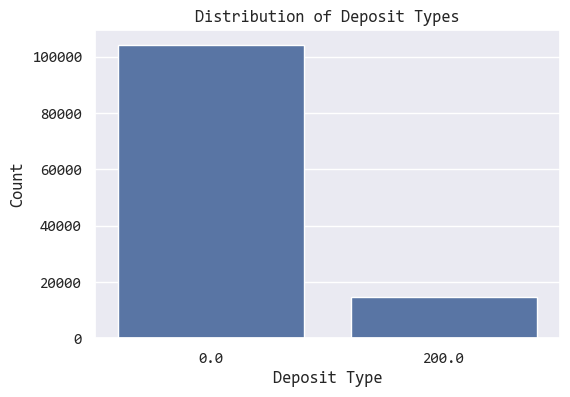

In [19]:
plt.figure(figsize=(6, 4))
sns.set(font='Consolas', font_scale=1.0)
sns.countplot(data=hotel_eng, x='deposit_type_encoded')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.title('Distribution of Deposit Types')
plt.show()


In [20]:

# encode the hotel variable as 0 for Resort Hotel and 1 for City Hotel
hotel_to_binary = { 'Resort Hotel': 0,
                  'City Hotel':1}
hotel_eng['hotel'] =hotel_eng['hotel'].map(hotel_to_binary)



## Compute correlation coefficients for likely good predictors

In [21]:
# obsolete code...
# Decide to focus only on the City Hotel
# why ? 
# covers 66% of the data, so not too biased	
# good to narrow down on factors for one hotel ?
# need this in order for assigned_room_type to work, but we dont use it.
# hotel_eng = hotel_eng[hotel_eng['hotel'] == 1]

In [22]:
#Correlation coefficients for some of the suspected features

independent_variables = ['days_in_waiting_list', 'is_repeated_guest', 'deposit_type_encoded', 'booking_changes', 'previous_cancellation_ratio', 'assigned_as_reserved']
dependent_variable = 'is_canceled'


for i in independent_variables:
    correlation_1 = hotel_eng[[i, 'is_canceled']].corr().iloc[0, 1]
    print("Correlation coefficient for %s = %f" % (i, correlation_1))



Correlation coefficient for days_in_waiting_list = 0.054016
Correlation coefficient for is_repeated_guest = -0.085179
Correlation coefficient for deposit_type_encoded = 0.481512
Correlation coefficient for booking_changes = -0.144659
Correlation coefficient for previous_cancellation_ratio = 0.291554
Correlation coefficient for assigned_as_reserved = 0.246732


## ! Very few people go forward with booking when they have paid a deposit. fewer than cancel ? why ?


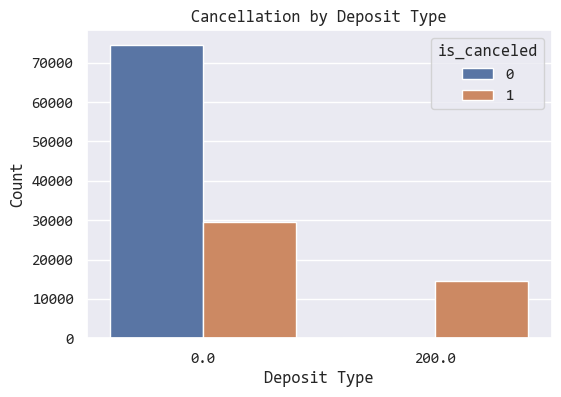

In [23]:
plt.figure(figsize=(6, 4))
sns.set(font='Consolas', font_scale=1.0)
sns.countplot(data=hotel_eng, x='deposit_type_encoded', hue='is_canceled')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.title('Cancellation by Deposit Type')
plt.show()



## Explode and encode categorical for modeling

In [24]:
# do prediction on all but date columns to not bias 'ask pedro'
hotel_eng = hotel_eng.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'reservation_status_date'])

#encode categorical
hotel_eng_numerical = hotel_eng.select_dtypes(include=['float64','int64'])

hotel_eng_categorical= hotel_eng.select_dtypes(include=['object'])

hotel_eng_encoded=pd.get_dummies(hotel_eng_categorical)

hotel_eng_encoded_plus_numerical = pd.concat([hotel_eng_encoded, hotel_eng_numerical], axis=1)

## ML Model: Decision tree
### one independent variable and 5 tree depth

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score




#split into train and test 70/30    
hotel_eng_train, hotel_eng_test = train_test_split(hotel_eng, test_size=0.3, random_state=42)


X_t5_train = hotel_eng_train[["previous_cancellation_ratio"]]

y_t5_train = hotel_eng_train[["is_canceled"]]

X_t5_test = hotel_eng_test[["previous_cancellation_ratio"]]
y_t5_test = hotel_eng_test[["is_canceled"]]


#run a first tree prediction with 5 bound depth and only one variable as X
tree_bound5 = tree.DecisionTreeClassifier( max_depth = 5 )

model_t5 = tree_bound5.fit(X_t5_train,y_t5_train)

y_t5_predict = tree_bound5.predict(X_t5_test)

accuracy_5t = accuracy_score(y_t5_test, y_t5_predict , normalize=False)
cm_5t = confusion_matrix(y_t5_test, y_t5_predict)

classification_report = classification_report(y_t5_test, y_t5_predict)
print("Classification report for t5:")
print(classification_report)


Classification report for t5:
              precision    recall  f1-score   support

           0       0.66      1.00      0.79     22318
           1       0.99      0.13      0.23     13352

    accuracy                           0.67     35670
   macro avg       0.82      0.56      0.51     35670
weighted avg       0.78      0.67      0.58     35670



In [26]:
# reporting on evaluation metrics
accuracy = accuracy_score(y_t5_test, y_t5_predict)
precision = precision_score(y_t5_test, y_t5_predict)
recall = recall_score(y_t5_test, y_t5_predict)
f1 = f1_score(y_t5_test, y_t5_predict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6739276703111858
Precision: 0.9891984081864695
Recall: 0.13031755542240864
F1-score: 0.2302958109986103


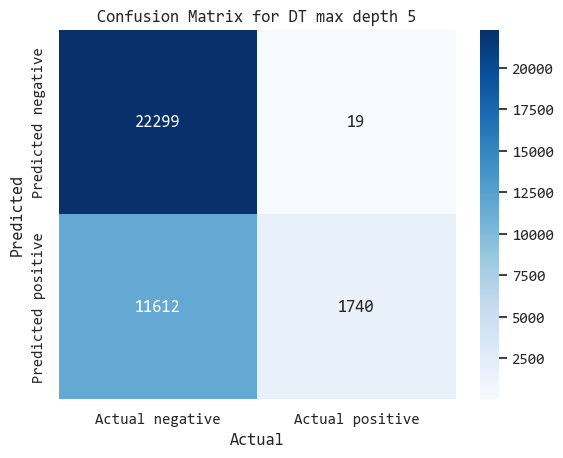

In [27]:
# Create the Type 1 and Type 2 error heatmap
sns.heatmap(cm_5t, annot=True, fmt='d', cmap='Blues', xticklabels=['Actual negative', 'Actual positive'], yticklabels=['Predicted negative', 'Predicted positive'])

# Set the axis labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion Matrix for DT max depth 5')

# Show the plot
plt.show()



In [28]:
#want to visualize the tree for readability
# text_representation = tree.export_text(model_t10, feature_names = ["mpg", "weight"])
# print(text_representation)

### DT: Multi class/ multiple independent variables and 10 tree depth

In [29]:
#split into train and test 70/30    
hotel_eng_train, hotel_eng_test = train_test_split(hotel_eng, test_size=0.3, random_state=42)


X_t10_multiclass_train = hotel_eng_train[independent_variables]

y_t10_multiclass_train = hotel_eng_train[["is_canceled"]]

X_t10_multiclass_test = hotel_eng_test[independent_variables]
y_t10_multiclass_test = hotel_eng_test[["is_canceled"]]


#run a first tree prediction with 5 bound depth and only one variable as X
tree_bound10 = tree.DecisionTreeClassifier( max_depth = 10 )

model_t10 = tree_bound10.fit(X_t10_multiclass_train,y_t10_multiclass_train)

y_t10_multiclass_predict = tree_bound10.predict(X_t10_multiclass_test)

# reporting on evaluation metrics
accuracy = accuracy_score(y_t10_multiclass_test, y_t10_multiclass_predict)
precision = precision_score(y_t10_multiclass_test, y_t10_multiclass_predict)
recall = recall_score(y_t10_multiclass_test, y_t10_multiclass_predict)
f1 = f1_score(y_t10_multiclass_test, y_t10_multiclass_predict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)





Accuracy: 0.7657975890103729
Precision: 0.9936783879889372
Recall: 0.3767225883762732
F1-score: 0.546323449549256


### DT: Multi class/ multiple independent variables and unbound tree depth

In [30]:
#split into train and test 70/30    
hotel_eng_train, hotel_eng_test = train_test_split(hotel_eng, test_size=0.3, random_state=42)


X_unbound_multiclass_train = hotel_eng_train[independent_variables]

y_unbound_multiclass_train = hotel_eng_train[["is_canceled"]]

X_unbound_multiclass_test = hotel_eng_test[independent_variables]
y_unbound_multiclass_test = hotel_eng_test[["is_canceled"]]


#run a first tree prediction with 5 bound depth and only one variable as X
tree_unbound = tree.DecisionTreeClassifier()

model_unbound = tree_unbound.fit(X_unbound_multiclass_train,y_unbound_multiclass_train)

y_unbound_multiclass_predict = tree_unbound.predict(X_unbound_multiclass_test)

# reporting on evaluation metrics
accuracy = accuracy_score(y_unbound_multiclass_test, y_unbound_multiclass_predict)
precision = precision_score(y_unbound_multiclass_test, y_unbound_multiclass_predict)
recall = recall_score(y_unbound_multiclass_test, y_unbound_multiclass_predict)
f1 = f1_score(y_unbound_multiclass_test, y_unbound_multiclass_predict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)





Accuracy: 0.7662741799831791
Precision: 0.9908005480524564
Recall: 0.3791192330736968
F1-score: 0.5483993283137425


### DT: All columns used as independent variables and unbound tree depth

### only DT code cell to be working with exploded dummies encoded is below:

In [31]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


#split into train and test 70/30    
hotel_eng_train, hotel_eng_test = train_test_split(hotel_eng_encoded_plus_numerical, test_size=0.3, random_state=42)


X_unbound_multiclass_train = hotel_eng_train.drop(columns=['is_canceled'])

y_unbound_multiclass_train = hotel_eng_train[["is_canceled"]]

X_unbound_multiclass_test = hotel_eng_test.drop(columns=['is_canceled'])
y_unbound_multiclass_test = hotel_eng_test[["is_canceled"]]




# encode categorical variables left
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', 'passthrough', hotel_eng_encoded.columns)  # 'passthrough' to keep one-hot encoded features
    ])

# Create a pipeline with preprocessing and logistic regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(max_depth=2))])



#run a first tree prediction with 5 bound depth and only one variable as X

model_unbound = pipeline.fit(X_unbound_multiclass_train, y_unbound_multiclass_train)

y_unbound_multiclass_predict = model_unbound.predict(X_unbound_multiclass_test)

# reporting on evaluation metrics
accuracy = accuracy_score(y_unbound_multiclass_test, y_unbound_multiclass_predict)
precision = precision_score(y_unbound_multiclass_test, y_unbound_multiclass_predict)
recall = recall_score(y_unbound_multiclass_test, y_unbound_multiclass_predict)
f1 = f1_score(y_unbound_multiclass_test, y_unbound_multiclass_predict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)







Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [32]:
# proposal GPT for fixing overfitting:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create a pipeline with preprocessing and random forest classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_leaf=5, random_state=42))])

# Fit the model
model_unbound = pipeline.fit(X_unbound_multiclass_train, y_unbound_multiclass_train.values.ravel())

# Predict on the test set
y_unbound_multiclass_predict = model_unbound.predict(X_unbound_multiclass_test)

# reporting on evaluation metrics
accuracy = accuracy_score(y_unbound_multiclass_test, y_unbound_multiclass_predict)
precision = precision_score(y_unbound_multiclass_test, y_unbound_multiclass_predict)
recall = recall_score(y_unbound_multiclass_test, y_unbound_multiclass_predict)
f1 = f1_score(y_unbound_multiclass_test, y_unbound_multiclass_predict)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Perform cross-validation
scores = cross_val_score(pipeline, X_unbound_multiclass_train, y_unbound_multiclass_train.values.ravel(), cv=5)
print("Cross-validation scores:", scores)

Accuracy: 0.985085506027474
Precision: 1.0
Recall: 0.9601557819053326
F1-score: 0.979672932905395
Cross-validation scores: [0.97140454 0.98906644 0.9705635  0.97374587 0.98534094]


In [33]:
# now with scaling



# Preprocessing pipeline for numerical features
numerical_transformer = StandardScaler()

# Combine preprocessing pipelines for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X_numerical.columns),
        ('cat', 'passthrough', hotel_eng_encoded.columns)  # 'passthrough' to keep one-hot encoded features
    ])

# Create a pipeline with preprocessing and logistic regression model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])


NameError: name 'LogisticRegression' is not defined